### DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("h1b_kaggle.csv")

In [3]:
data.shape

(3002458, 11)

In [4]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [6]:
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [7]:
data.shape

(2877765, 11)

In [8]:
data.CASE_STATUS.value_counts()

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877765 entries, 0 to 3002444
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 263.5+ MB


In [10]:
import warnings
warnings.filterwarnings("ignore")
data.CASE_STATUS[data['CASE_STATUS']=='REJECTED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'
data = data.drop(data[data.CASE_STATUS == 'WITHDRAWN'].index)

In [11]:
data = data.drop('lat', axis = 1)
data = data.drop('lon', axis = 1)

In [12]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,2,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,3,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,4,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
5,6,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA"


In [13]:
data['NEW_EMPLOYER'] = np.nan
data.shape

(2793013, 10)

In [14]:
data['EMPLOYER_NAME'] = data['EMPLOYER_NAME'].str.lower()
data.NEW_EMPLOYER[data['EMPLOYER_NAME'].str.contains('university')] = 'university'
data['NEW_EMPLOYER']= data.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

In [15]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,NEW_EMPLOYER
0,1,CERTIFIED,university of michigan,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university
1,2,CERTIFIED,"goodman networks, inc.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",non university
2,3,CERTIFIED,"ports america group, inc.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",non university
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",non university
5,6,CERTIFIED,burger king corporation,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",non university


In [16]:
## Splitting city and state and capturing state in another variable
data['state'] = data.WORKSITE.str.split(',').str[-1]

In [17]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,NEW_EMPLOYER,state
0,1,CERTIFIED,university of michigan,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university,MICHIGAN
1,2,CERTIFIED,"goodman networks, inc.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",non university,TEXAS
2,3,CERTIFIED,"ports america group, inc.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",non university,NEW JERSEY
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",non university,COLORADO
5,6,CERTIFIED,burger king corporation,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",non university,FLORIDA


In [18]:
data = data.drop('EMPLOYER_NAME', axis = 1)
data = data.drop('WORKSITE', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)

In [19]:
data.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
0,CERTIFIED,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,university,MICHIGAN
1,CERTIFIED,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,non university,TEXAS
2,CERTIFIED,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,non university,NEW JERSEY
3,CERTIFIED,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,non university,COLORADO
5,CERTIFIED,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,non university,FLORIDA


In [20]:
data.CASE_STATUS.value_counts()

CERTIFIED    2707835
DENIED         85178
Name: CASE_STATUS, dtype: int64

In [21]:
 from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[['CASE_STATUS','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','NEW_EMPLOYER','state']] = data[['CASE_STATUS','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','NEW_EMPLOYER','state']].apply(le.fit_transform)

In [22]:
data.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
0,0,160,153988,0,36067.0,2016.0,1,22
1,0,242,40901,1,242674.0,2016.0,0,45
2,0,242,40967,1,193066.0,2016.0,0,31
3,0,242,176465,1,220314.0,2016.0,0,5
5,0,242,83327,1,225000.0,2016.0,0,9


In [23]:
data.NEW_EMPLOYER.value_counts()

0    2660386
1     132627
Name: NEW_EMPLOYER, dtype: int64

In [24]:
data.FULL_TIME_POSITION.value_counts()

1    2398936
0     394077
Name: FULL_TIME_POSITION, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2793013 entries, 0 to 3002392
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         int32  
 1   SOC_NAME            int32  
 2   JOB_TITLE           int32  
 3   FULL_TIME_POSITION  int32  
 4   PREVAILING_WAGE     float64
 5   YEAR                float64
 6   NEW_EMPLOYER        int32  
 7   state               int32  
dtypes: float64(2), int32(6)
memory usage: 127.9 MB


### DATA VISUALISATION

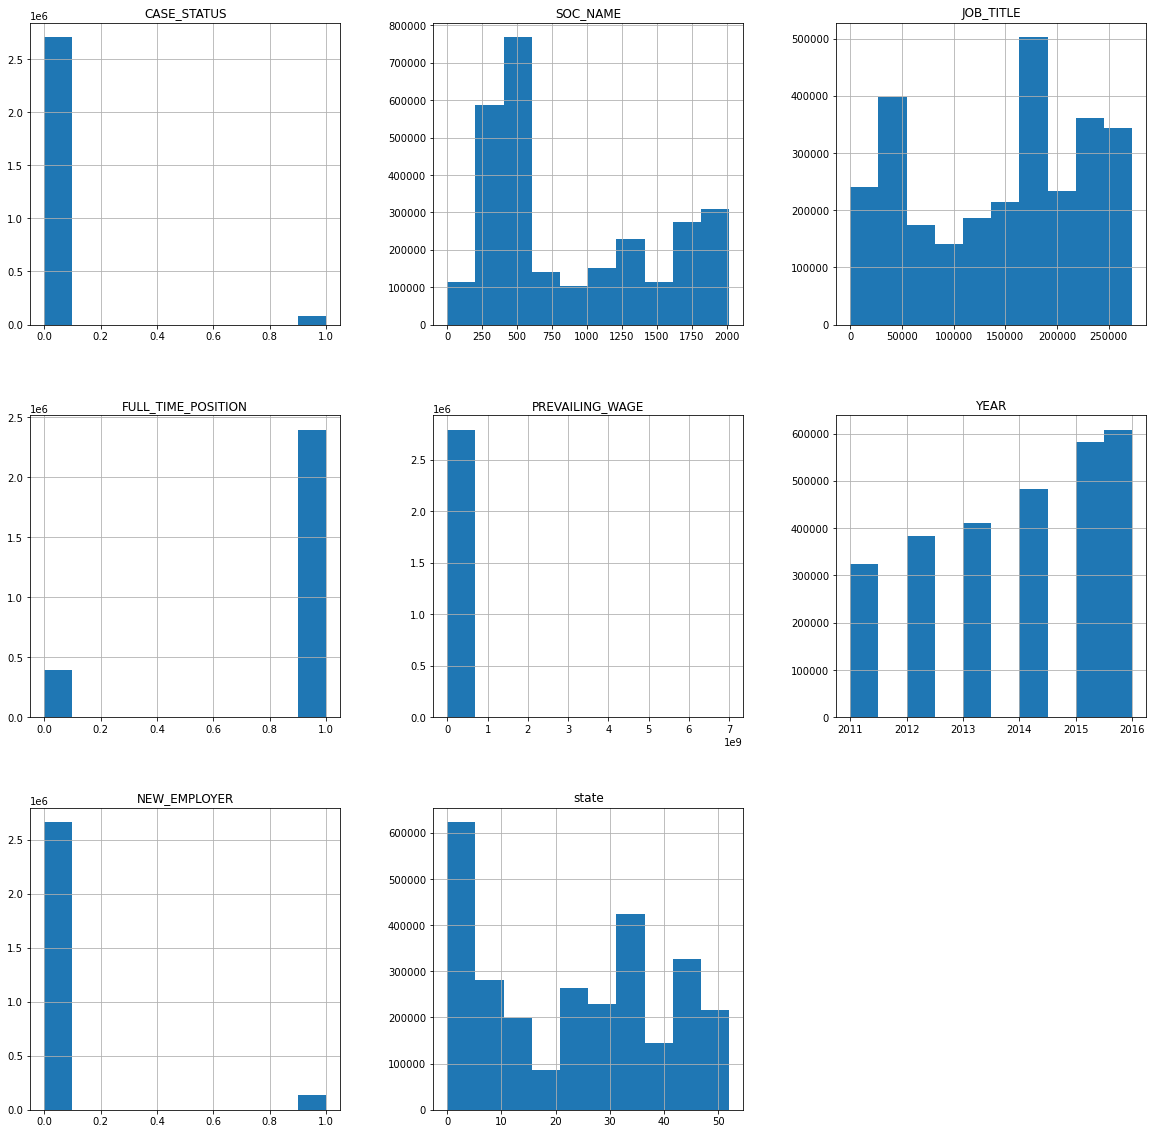

In [24]:
data.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

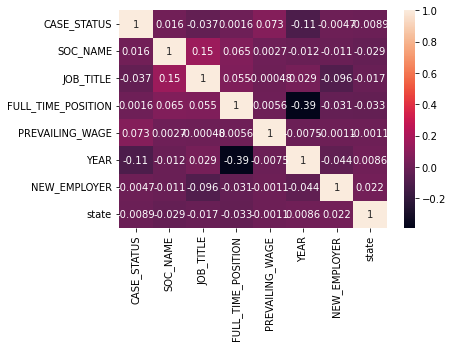

In [25]:
corr=data.corr()
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='CASE_STATUS', ylabel='state'>

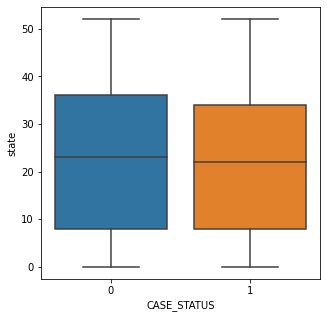

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(x='CASE_STATUS', y='state', data=data)

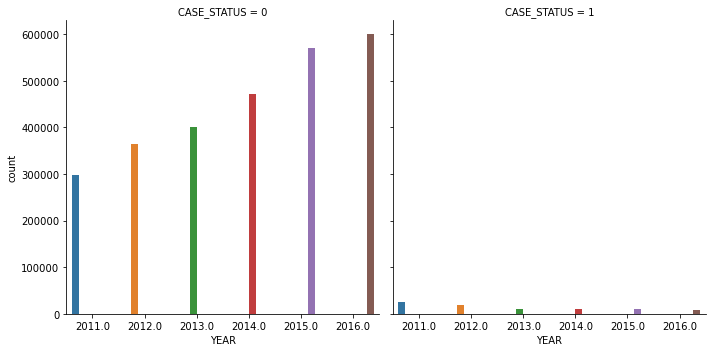

In [27]:
sns.catplot(x="YEAR",hue="YEAR",col="CASE_STATUS",data=data,kind="count")

<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

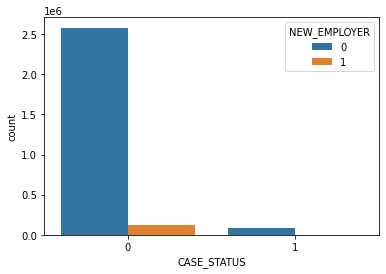

In [28]:
sns.countplot(x="CASE_STATUS",hue="NEW_EMPLOYER",data=data)

<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

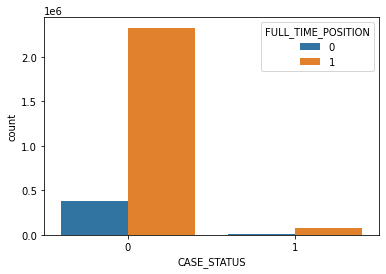

In [29]:
sns.countplot(x="CASE_STATUS",hue="FULL_TIME_POSITION",data=data)

<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

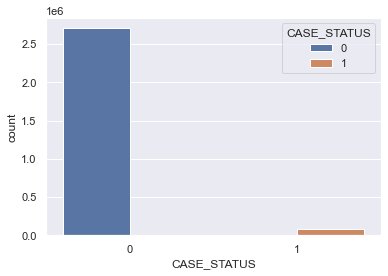

In [30]:
sns.set(style="darkgrid")
sns.countplot(x="CASE_STATUS", data=data,hue="CASE_STATUS")

### UNDERSAMPLING THE DATA

In [31]:
x = data.drop('CASE_STATUS', axis=1)
y = data.CASE_STATUS

In [32]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_res,y_res = nm.fit_resample(x,y)

In [33]:
data.shape

(2793013, 8)

In [34]:
x_res.shape

(170356, 7)

In [35]:
y_res.shape

(170356,)

In [36]:
data.YEAR.value_counts()   #before undersampling

2016.0    608314
2015.0    581597
2014.0    482870
2013.0    411501
2012.0    384270
2011.0    324461
Name: YEAR, dtype: int64

In [37]:
x_res.YEAR.value_counts()

2015.0    39222
2016.0    34608
2014.0    32140
2011.0    25986
2013.0    19534
2012.0    18866
Name: YEAR, dtype: int64

In [38]:
y_res.value_counts()

0    85178
1    85178
Name: CASE_STATUS, dtype: int64

### OVERALL MODELS

### 1.LOGISTIC REGRESSION

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print('Logisitic Classification Report:')
print(classification_report(y_test, pred))
print('\n')

Logisitic Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     16942
           1       0.69      0.67      0.68     17130

    accuracy                           0.68     34072
   macro avg       0.68      0.68      0.68     34072
weighted avg       0.68      0.68      0.68     34072





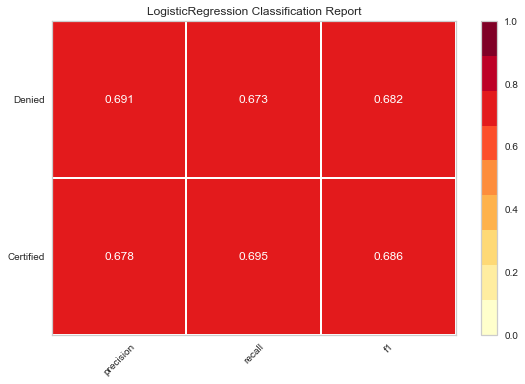

In [42]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(lg, classes=['Certified','Denied'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

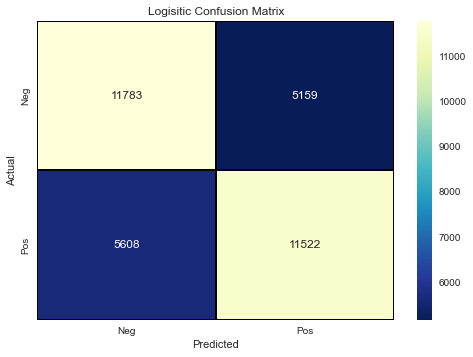

In [43]:
cm = confusion_matrix(y_test,pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu_r',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Logisitic Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [44]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
l_accuracy=round(accuracy_score(y_test, pred)*100,2)
l_recall = round(recall_score(y_test,pred)*100,2)
l_f1=round(f1_score(y_test,pred)*100,2)
l_prec=round(precision_score(y_test,pred)*100,2)
print(l_recall)
print(l_f1)
print(l_prec)
print(l_accuracy)

67.26
68.16
69.07
68.4


### 2) DECISION TREE CLASSIFIER

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)
d_pred = dtc.predict(x_test)

In [46]:
print('Decision Tree Classification Report:')
print(classification_report(y_test,d_pred))
print('\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16942
           1       0.99      0.96      0.98     17130

    accuracy                           0.98     34072
   macro avg       0.98      0.98      0.98     34072
weighted avg       0.98      0.98      0.98     34072





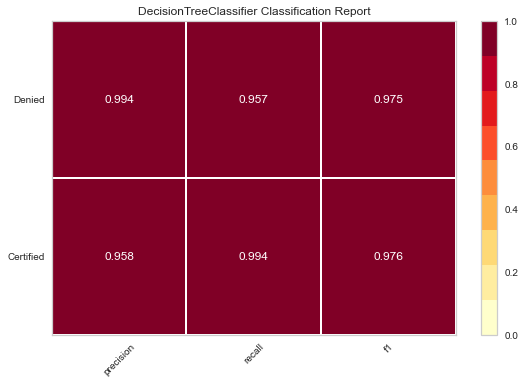

In [47]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(dtc, classes=['Certified','Denied'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

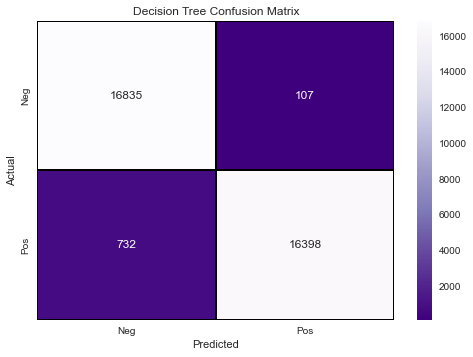

In [48]:
cm = confusion_matrix(y_test,d_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='Purples_r',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Decision Tree Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [49]:
from sklearn.metrics import accuracy_score
d_accuracy=round(accuracy_score(y_test,d_pred)*100,2)
d_recall = round(recall_score(y_test,d_pred)*100,2)
d_f1=round(f1_score(y_test,d_pred)*100,2)
d_prec=round(precision_score(y_test,d_pred)*100,2)
print(d_recall)
print(d_f1)
print(d_prec)
print(d_accuracy)

95.73
97.51
99.35
97.54


### 3)NAIVE BAYES CLASSIFIER

In [50]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
n_pred=nb.predict(x_test)

In [51]:
print('Naive Bayes Classification Report:')
print(classification_report(y_test,n_pred))
print('\n')

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.99      0.68     16942
           1       0.92      0.06      0.12     17130

    accuracy                           0.53     34072
   macro avg       0.72      0.53      0.40     34072
weighted avg       0.72      0.53      0.40     34072





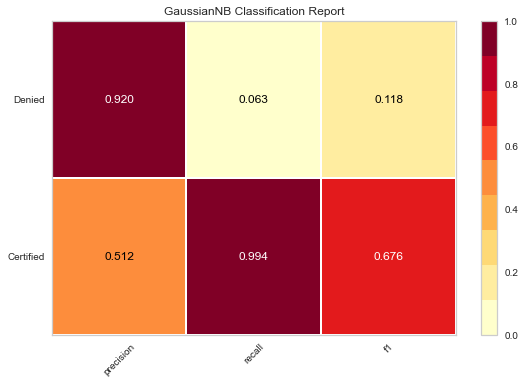

In [52]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(nb, classes=['Certified','Denied'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

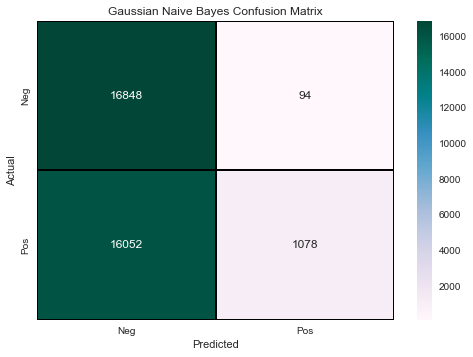

In [53]:
cm = confusion_matrix(y_test,n_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='PuBuGn',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Gaussian Naive Bayes Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [54]:
from sklearn.metrics import accuracy_score
nb_accuracy=round(accuracy_score(y_test,n_pred)*100,2)
nb_recall = round(recall_score(y_test,n_pred)*100,2)
nb_f1=round(f1_score(y_test,n_pred)*100,2)
nb_prec=round(precision_score(y_test,n_pred)*100,2)
print(nb_recall)
print(nb_f1)
print(nb_prec)
print(nb_accuracy)

6.29
11.78
91.98
52.61


### 4)RANDOM FOREST CLASSIFIER

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=11)
rf.fit(x_train,y_train)
r_pred=rf.predict(x_test)

In [56]:
print('Random forest Classification Report:')
print(classification_report(y_test,r_pred))
print('\n')

Random forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16942
           1       0.99      0.96      0.98     17130

    accuracy                           0.98     34072
   macro avg       0.98      0.98      0.98     34072
weighted avg       0.98      0.98      0.98     34072





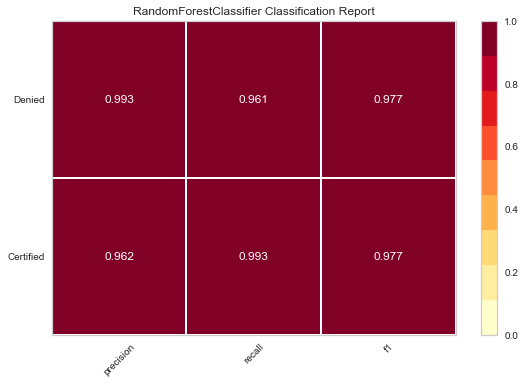

In [57]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(rf, classes=['Certified','Denied'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

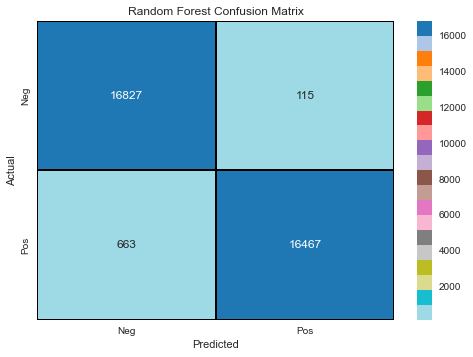

In [58]:
cm = confusion_matrix(y_test,r_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='tab20_r',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [59]:
from sklearn.metrics import accuracy_score
r_accuracy=round(accuracy_score(y_test,r_pred)*100,2)
r_recall = round(recall_score(y_test,r_pred)*100,2)
r_f1=round(f1_score(y_test,r_pred)*100,2)
r_prec=round(precision_score(y_test,r_pred)*100,2)
print(r_recall)
print(r_f1)
print(r_prec)
print(r_accuracy)

96.13
97.69
99.31
97.72


### 5)KNN CLASSIFIER

In [60]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
k_pred = knn.predict(x_test)

In [61]:
print('KNN Classification Report:')
print(classification_report(y_test,k_pred))
print('\n')

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     16942
           1       0.99      0.95      0.97     17130

    accuracy                           0.97     34072
   macro avg       0.97      0.97      0.97     34072
weighted avg       0.97      0.97      0.97     34072





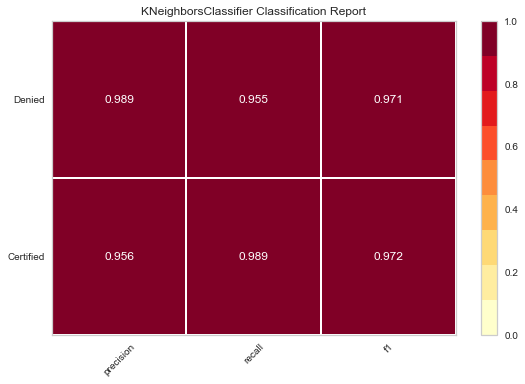

In [62]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn, classes=['Certified','Denied'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

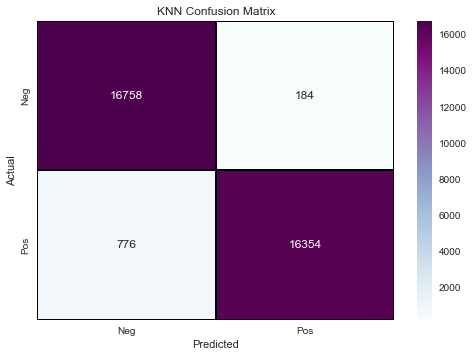

In [63]:
cm = confusion_matrix(y_test,k_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='BuPu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('KNN Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [64]:
from sklearn.metrics import accuracy_score
k_accuracy=round(accuracy_score(y_test,k_pred)*100,2)
k_recall = round(recall_score(y_test,k_pred)*100,2)
k_f1=round(f1_score(y_test,k_pred)*100,2)
k_prec=round(precision_score(y_test,k_pred)*100,2)
print(k_recall)
print(k_f1)
print(k_prec)
print(k_accuracy)

95.47
97.15
98.89
97.18


### DATA DIVISION INTO YEARS

## 2016

In [65]:
data16=data[data['YEAR'] == 2016]
d16=data16.copy(deep=False)
data16.to_csv('Data2016.csv', index=False)
data16.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
0,0,160,153988,0,36067.0,2016.0,1,22
1,0,242,40901,1,242674.0,2016.0,0,45
2,0,242,40967,1,193066.0,2016.0,0,31
3,0,242,176465,1,220314.0,2016.0,0,5
5,0,242,83327,1,225000.0,2016.0,0,9


<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

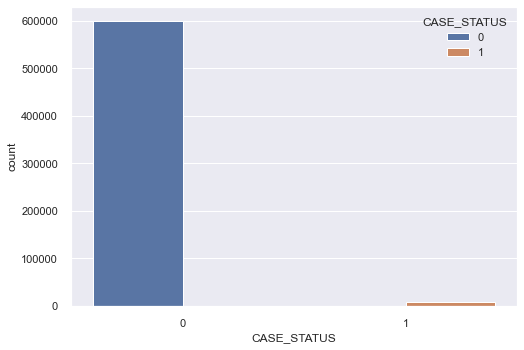

In [66]:
sns.set(style="darkgrid")
sns.countplot(x="CASE_STATUS", data=data16,hue="CASE_STATUS")

In [67]:
x16 = data16.drop('CASE_STATUS', axis=1)
y16 = data16.CASE_STATUS

from imblearn.under_sampling import NearMiss

nm = NearMiss()
xu16,yu16 = nm.fit_resample(x16,y16) 


In [68]:
data16.CASE_STATUS.value_counts()

0    599834
1      8480
Name: CASE_STATUS, dtype: int64

In [69]:
yu16.value_counts()

0    8480
1    8480
Name: CASE_STATUS, dtype: int64

In [70]:
d16.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
0,0,160,153988,0,36067.0,2016.0,1,22
1,0,242,40901,1,242674.0,2016.0,0,45
2,0,242,40967,1,193066.0,2016.0,0,31
3,0,242,176465,1,220314.0,2016.0,0,5
5,0,242,83327,1,225000.0,2016.0,0,9


In [71]:
n0=d16[d16['CASE_STATUS']==0]
df=n0.sample(n=20000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu16=xu16.append(nx)
yu16=yu16.append(ny)

In [72]:
yu16.value_counts()

0    28480
1     8480
Name: CASE_STATUS, dtype: int64

## 2015

In [73]:
data15=data[data['YEAR'] == 2015]
d15=data15.copy(deep=True)
data15.to_csv('Data2015.csv', index=False)
data15.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
647804,0,678,15030,1,42860.0,2015.0,1,37
647806,0,651,52484,1,65998.0,2015.0,0,45
647807,0,337,62478,1,96907.0,2015.0,0,48
647809,0,1745,241893,1,133976.0,2015.0,0,4
647810,0,1401,54820,1,64085.0,2015.0,0,48


<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

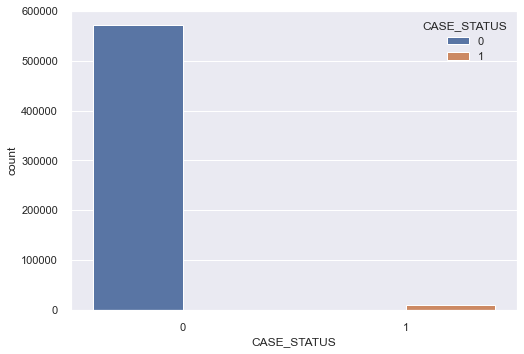

In [74]:
sns.set(style="darkgrid")
sns.countplot(x="CASE_STATUS", data=data15,hue="CASE_STATUS")

In [75]:
x15 = data15.drop('CASE_STATUS', axis=1)
y15 = data15.CASE_STATUS

from imblearn.under_sampling import NearMiss

nm = NearMiss()
xu15,yu15 = nm.fit_resample(x15,y15) 


In [76]:
data15.CASE_STATUS.value_counts()

0    571560
1     10037
Name: CASE_STATUS, dtype: int64

In [77]:
yu15.value_counts()

0    10037
1    10037
Name: CASE_STATUS, dtype: int64

In [78]:
n0=d15[d15['CASE_STATUS']==0]
df=n0.sample(n=20000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu15=xu15.append(nx)
yu15=yu15.append(ny)

In [79]:
yu15.value_counts()

0    30037
1    10037
Name: CASE_STATUS, dtype: int64

## 2014

In [80]:
data14=data[data['YEAR'] == 2014]
d14=data14.copy(deep=True)
data14.to_csv('Data2014.csv', index=False)
data14.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
1266530,0,207,153789,1,43118.0,2014.0,1,45
1266531,0,1424,144930,1,64251.0,2014.0,0,14
1266533,0,83,105783,1,47424.0,2014.0,0,10
1266534,0,487,164618,1,61589.0,2014.0,0,4
1266535,0,487,164618,1,53706.0,2014.0,0,34


<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

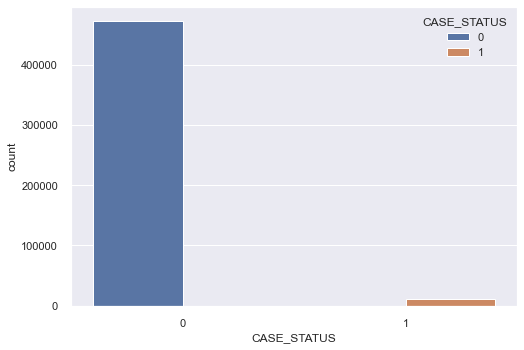

In [81]:
sns.set(style="darkgrid")
sns.countplot(x="CASE_STATUS", data=data14,hue="CASE_STATUS")

In [82]:
x14 = data14.drop('CASE_STATUS', axis=1)
y14 = data14.CASE_STATUS

from imblearn.under_sampling import NearMiss

nm = NearMiss()
xu14,yu14 = nm.fit_resample(x14,y14) 


In [83]:
data14.CASE_STATUS.value_counts()

0    472052
1     10818
Name: CASE_STATUS, dtype: int64

In [84]:
yu14.value_counts()

0    10818
1    10818
Name: CASE_STATUS, dtype: int64

In [85]:
n0=d14[d14['CASE_STATUS']==0]
df=n0.sample(n=20000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu14=xu14.append(nx)
yu14=yu14.append(ny)

In [86]:
yu14.value_counts()

0    30818
1    10818
Name: CASE_STATUS, dtype: int64

## 2013

In [87]:
data13=data[data['YEAR'] == 2013]
d13=data13.copy(deep=True)
data13.to_csv('Data2013.csv', index=False)
data13.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
1785958,0,1132,115322,0,29827.2,2013.0,0,33
1785960,0,204,153572,1,38293.0,2013.0,1,42
1785961,0,1951,41414,1,23350.0,2013.0,0,21
1785962,0,1543,149986,1,54724.8,2013.0,0,30
1785963,0,936,64371,1,95971.0,2013.0,0,21


<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

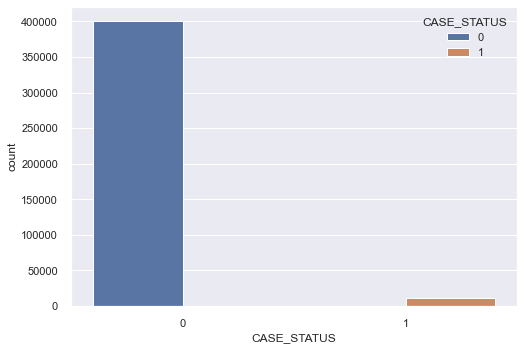

In [88]:
sns.set(style="darkgrid")
sns.countplot(x="CASE_STATUS", data=data13,hue="CASE_STATUS")

In [89]:
x13 = data13.drop('CASE_STATUS', axis=1)
y13 = data13.CASE_STATUS

from imblearn.under_sampling import NearMiss

nm = NearMiss()
xu13,yu13 = nm.fit_resample(x13,y13) 


In [90]:
data13.CASE_STATUS.value_counts()

0    400510
1     10991
Name: CASE_STATUS, dtype: int64

In [91]:
yu13.value_counts()

0    10991
1    10991
Name: CASE_STATUS, dtype: int64

In [92]:
n0=d13[d13['CASE_STATUS']==0]
df=n0.sample(n=20000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu13=xu13.append(nx)
yu13=yu13.append(ny)

In [93]:
yu13.value_counts()

0    30991
1    10991
Name: CASE_STATUS, dtype: int64

## 2012

In [94]:
data12=data[data['YEAR'] == 2012]
d12=data12.copy(deep=True)
data12.to_csv('Data2012.csv', index=False)
data12.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
2228071,0,487,47338,1,45282.0,2012.0,0,2
2228072,0,487,47338,1,46446.0,2012.0,0,4
2228073,0,1881,46719,1,41350.0,2012.0,0,22
2228074,0,487,47338,1,46405.0,2012.0,0,45
2228075,0,485,47338,1,50752.0,2012.0,0,33


<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

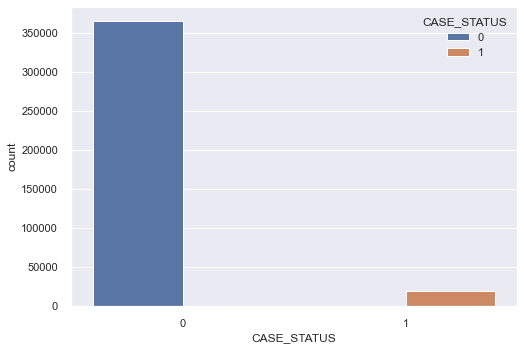

In [95]:
sns.set(style="darkgrid")
sns.countplot(x="CASE_STATUS", data=data12,hue="CASE_STATUS")

In [96]:
x12 = data12.drop('CASE_STATUS', axis=1)
y12 = data12.CASE_STATUS

from imblearn.under_sampling import NearMiss

nm = NearMiss()
xu12,yu12 = nm.fit_resample(x12,y12) 


In [97]:
data12.CASE_STATUS.value_counts()

0    365404
1     18866
Name: CASE_STATUS, dtype: int64

In [98]:
yu12.value_counts()

0    18866
1    18866
Name: CASE_STATUS, dtype: int64

In [99]:
n0=d12[d12['CASE_STATUS']==0]
df=n0.sample(n=20000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu12=xu12.append(nx)
yu12=yu12.append(ny)

In [100]:
yu12.value_counts()

0    38866
1    18866
Name: CASE_STATUS, dtype: int64

## 2011

In [101]:
data11=data[data['YEAR'] == 2011]
d11=data11.copy(deep=True)
data11.to_csv('Data2011.csv', index=False)
data11.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,state
2643679,0,492,168153,1,101088.0,2011.0,0,33
2643680,0,492,158121,1,77480.0,2011.0,0,45
2643681,0,748,71933,1,165506.0,2011.0,0,45
2643682,0,500,256247,1,62358.0,2011.0,0,21
2643683,0,1288,201264,1,111405.0,2011.0,0,38


<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

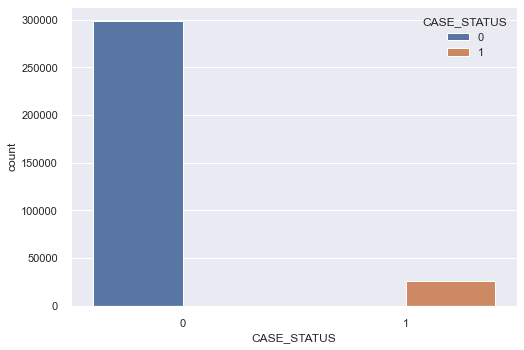

In [102]:
sns.set(style="darkgrid")
sns.countplot(x="CASE_STATUS", data=data11,hue="CASE_STATUS")

In [103]:
x11 = data11.drop('CASE_STATUS', axis=1)
y11 = data11.CASE_STATUS

from imblearn.under_sampling import NearMiss

nm = NearMiss()
xu11,yu11 = nm.fit_resample(x11,y11) 


In [104]:
data11.CASE_STATUS.value_counts()

0    298475
1     25986
Name: CASE_STATUS, dtype: int64

In [105]:
yu11.value_counts()

0    25986
1    25986
Name: CASE_STATUS, dtype: int64

In [106]:
n0=d11[d11['CASE_STATUS']==0]
df=n0.sample(n=20000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu11=xu11.append(nx)
yu11=yu11.append(ny)

In [107]:
yu11.value_counts()

0    45986
1    25986
Name: CASE_STATUS, dtype: int64

### APPLYING RANDOM FOREST TO 2011 AND 2016

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss


from sklearn.ensemble import RandomForestClassifier
rf11=RandomForestClassifier(n_estimators=11)
rf11.fit(xu11,yu11)
r11_pred=rf11.predict(xu16)


### Classification report for 2016 using 2011

In [109]:
print(classification_report(yu16,r11_pred))

              precision    recall  f1-score   support

           0       0.79      0.26      0.39     28480
           1       0.24      0.77      0.36      8480

    accuracy                           0.37     36960
   macro avg       0.51      0.51      0.37     36960
weighted avg       0.66      0.37      0.38     36960



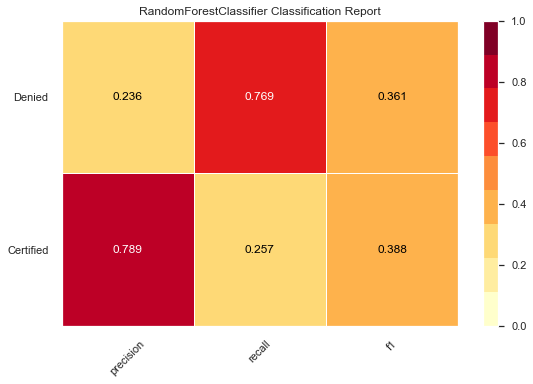

In [110]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf11, classes=['Certified','Denied'])
visualizer.fit(xu11, yu11)
visualizer.score(xu16, yu16)
g = visualizer.poof()

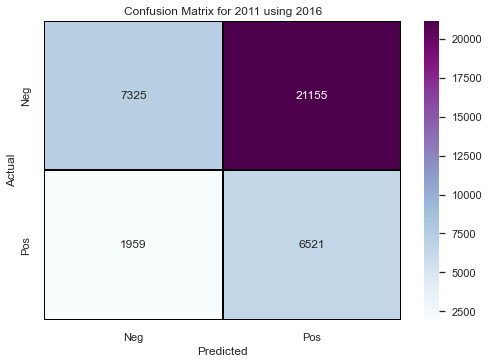

In [111]:
cm = confusion_matrix(yu16,r11_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='BuPu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix for 2011 using 2016')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [112]:
from sklearn.metrics import accuracy_score
r11_accuracy=round(accuracy_score(yu16,r11_pred)*100,2)
r11_recall = round(recall_score(yu16,r11_pred)*100,2)
r11_f1=round(f1_score(yu16,r11_pred)*100,2)
r11_prec=round(precision_score(yu16,r11_pred)*100,2)
print(r11_recall)
print(r11_f1)
print(r11_prec)
print(r11_accuracy)

76.9
36.07
23.56
37.46


### APPLYING RANDOM FOREST TO 2012 AND 2016

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf12=RandomForestClassifier(n_estimators=11)
rf12.fit(xu12,yu12)
r12_pred=rf12.predict(xu16)


### Classification report for 2016 using 2012

In [114]:
print(classification_report(yu16,r12_pred))

              precision    recall  f1-score   support

           0       0.80      0.35      0.48     28480
           1       0.24      0.71      0.36      8480

    accuracy                           0.43     36960
   macro avg       0.52      0.53      0.42     36960
weighted avg       0.67      0.43      0.45     36960



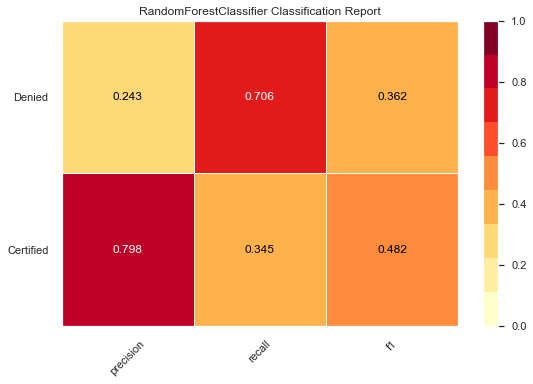

In [115]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf12, classes=['Certified','Denied'])
visualizer.fit(xu12, yu12)
visualizer.score(xu16, yu16)
g = visualizer.poof()

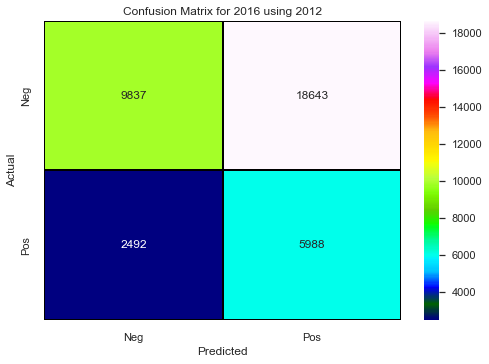

In [116]:
cm = confusion_matrix(yu16,r12_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='gist_ncar',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix for 2016 using 2012')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [117]:
from sklearn.metrics import accuracy_score
r12_accuracy=round(accuracy_score(yu16,r12_pred)*100,2)
r12_recall = round(recall_score(yu16,r12_pred)*100,2)
r12_f1=round(f1_score(yu16,r12_pred)*100,2)
r12_prec=round(precision_score(yu16,r12_pred)*100,2)
print(r12_recall)
print(r12_f1)
print(r12_prec)
print(r12_accuracy)

70.61
36.17
24.31
42.82


### APPLYING RANDOM FOREST TO 2013 AND 2016

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf13=RandomForestClassifier(n_estimators=11)
rf13.fit(xu13,yu13)
r13_pred=rf13.predict(xu16)


### Classification report for 2016 using 2013

In [119]:
print(classification_report(yu16,r13_pred))

              precision    recall  f1-score   support

           0       0.78      0.47      0.59     28480
           1       0.24      0.56      0.33      8480

    accuracy                           0.49     36960
   macro avg       0.51      0.51      0.46     36960
weighted avg       0.66      0.49      0.53     36960



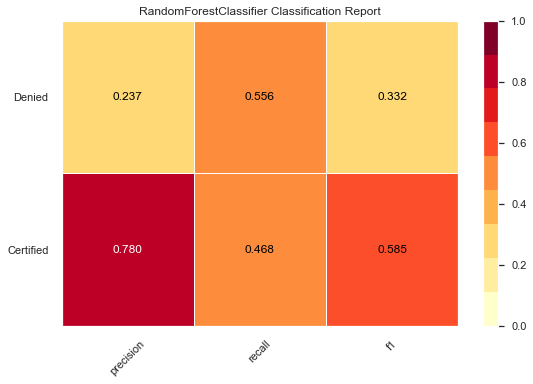

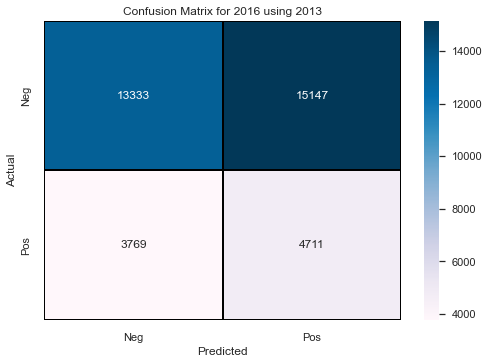

55.55
33.25
23.72
48.82


In [120]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf13, classes=['Certified','Denied'])
visualizer.fit(xu13, yu13)
visualizer.score(xu16, yu16)
g = visualizer.poof()

cm = confusion_matrix(yu16,r13_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='PuBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix for 2016 using 2013')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


from sklearn.metrics import accuracy_score
r13_accuracy=round(accuracy_score(yu16,r13_pred)*100,2)
r13_recall = round(recall_score(yu16,r13_pred)*100,2)
r13_f1=round(f1_score(yu16,r13_pred)*100,2)
r13_prec=round(precision_score(yu16,r13_pred)*100,2)
print(r13_recall)
print(r13_f1)
print(r13_prec)
print(r13_accuracy)

### APPLYING RANDOM FOREST TO 2014 AND 2016

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf14=RandomForestClassifier(n_estimators=11)
rf14.fit(xu14,yu14)
r14_pred=rf14.predict(xu16)


### Classification report for 2016 using 2014

In [122]:
print(classification_report(yu16,r14_pred))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68     28480
           1       0.27      0.53      0.36      8480

    accuracy                           0.57     36960
   macro avg       0.54      0.55      0.52     36960
weighted avg       0.68      0.57      0.60     36960



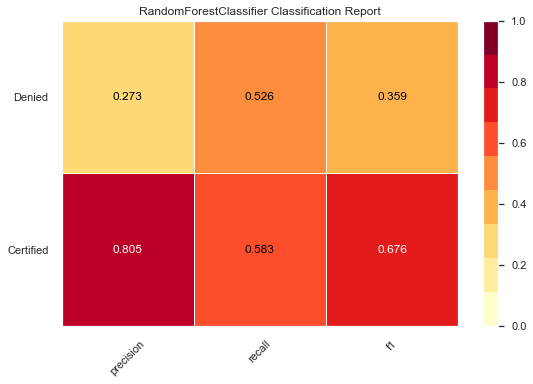

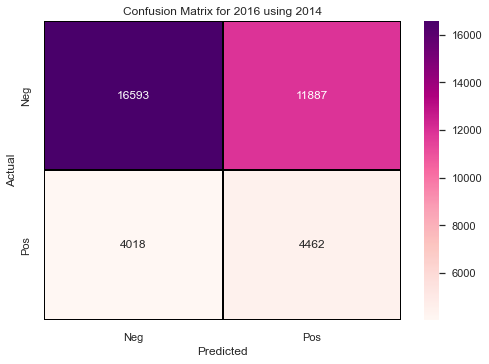

52.62
35.94
27.29
56.97


In [123]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf14, classes=['Certified','Denied'])
visualizer.fit(xu14, yu14)
visualizer.score(xu16, yu16)
g = visualizer.poof()

cm = confusion_matrix(yu16,r14_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='RdPu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix for 2016 using 2014')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


from sklearn.metrics import accuracy_score
r14_accuracy=round(accuracy_score(yu16,r14_pred)*100,2)
r14_recall = round(recall_score(yu16,r14_pred)*100,2)
r14_f1=round(f1_score(yu16,r14_pred)*100,2)
r14_prec=round(precision_score(yu16,r14_pred)*100,2)
print(r14_recall)
print(r14_f1)
print(r14_prec)
print(r14_accuracy)

### APPLYING RANDOM FOREST TO 2015 AND 2016

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf15=RandomForestClassifier(n_estimators=11)
rf15.fit(xu15,yu15)
r15_pred=rf15.predict(xu16)


### Classification report for 2016 using 2015

In [125]:
print(classification_report(yu16,r15_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     28480
           1       0.32      0.45      0.37      8480

    accuracy                           0.65     36960
   macro avg       0.57      0.58      0.57     36960
weighted avg       0.70      0.65      0.67     36960



In [126]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(yu16, r15_pred)*100,2))

65.28


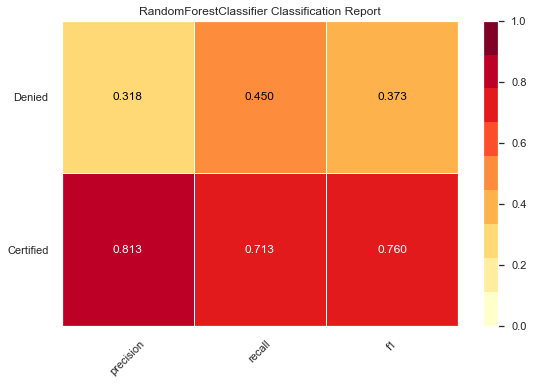

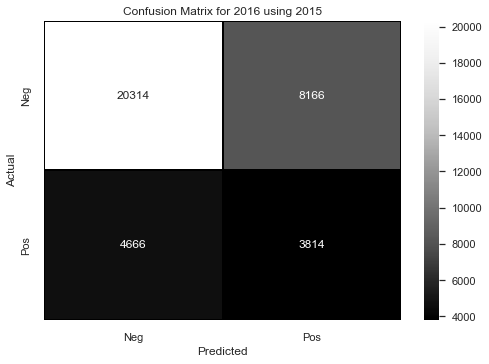

44.98
37.28
31.84
65.28


In [127]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf15, classes=['Certified','Denied'])
visualizer.fit(xu15, yu15)
visualizer.score(xu16, yu16)
g = visualizer.poof()

cm = confusion_matrix(yu16,r15_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='Greys_r',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix for 2016 using 2015')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


from sklearn.metrics import accuracy_score
r15_accuracy=round(accuracy_score(yu16,r15_pred)*100,2)
r15_recall = round(recall_score(yu16,r15_pred)*100,2)
r15_f1=round(f1_score(yu16,r15_pred)*100,2)
r15_prec=round(precision_score(yu16,r15_pred)*100,2)
print(r15_recall)
print(r15_f1)
print(r15_prec)
print(r15_accuracy)

### 2015 with 10,000 more Certified class data

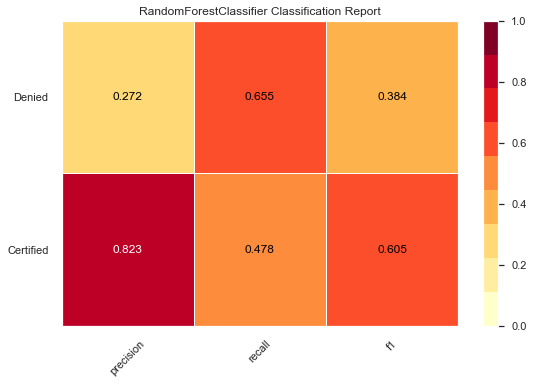

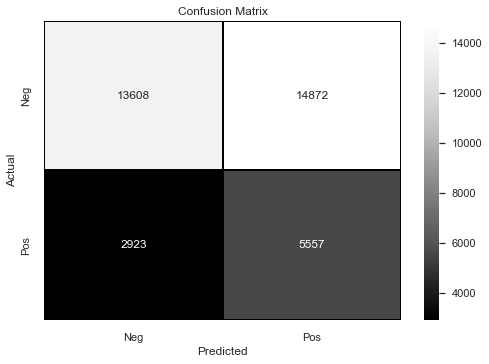

65.53
38.44
27.2
51.85


In [128]:
data15=data[data['YEAR'] == 2015]
d15=data15.copy(deep=True)
data15.to_csv('Data2015.csv', index=False)
data15.head()


x15 = data15.drop('CASE_STATUS', axis=1)
y15 = data15.CASE_STATUS
from imblearn.under_sampling import NearMiss
nm = NearMiss()
xu15,yu15 = nm.fit_resample(x15,y15) 

data15.CASE_STATUS.value_counts()

yu15.value_counts()

n0=d15[d15['CASE_STATUS']==0]
df=n0.sample(n=10000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu15=xu15.append(nx)
yu15=yu15.append(ny)


from sklearn.ensemble import RandomForestClassifier
rf15=RandomForestClassifier(n_estimators=11)
rf15.fit(xu15,yu15)
r15_pred=rf15.predict(xu16)


from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf15, classes=['Certified','Denied'])
visualizer.fit(xu15, yu15)
visualizer.score(xu16, yu16)
g = visualizer.poof()

cm = confusion_matrix(yu16,r15_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='Greys_r',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


from sklearn.metrics import accuracy_score
r151_accuracy=round(accuracy_score(yu16,r15_pred)*100,2)
r151_recall = round(recall_score(yu16,r15_pred)*100,2)
r151_f1=round(f1_score(yu16,r15_pred)*100,2)
r151_prec=round(precision_score(yu16,r15_pred)*100,2)
print(r151_recall)
print(r151_f1)
print(r151_prec)
print(r151_accuracy)





### 2015 with 20,000 more Certified class data

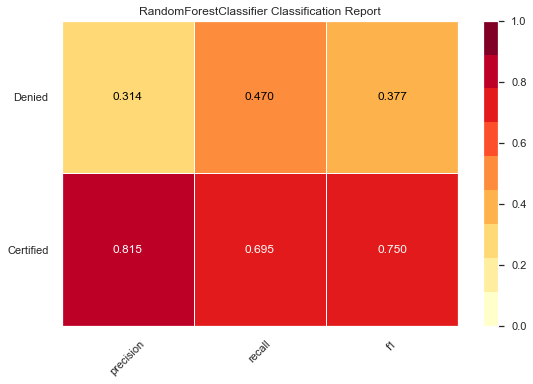

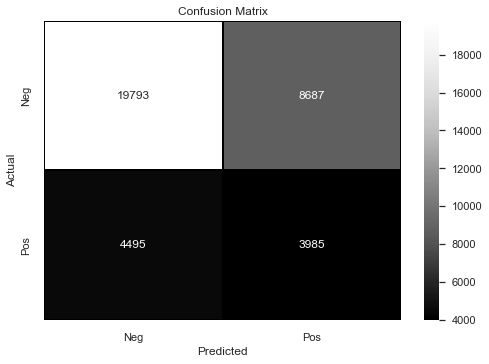

46.99
37.68
31.45
64.33


In [129]:
data15=data[data['YEAR'] == 2015]
d15=data15.copy(deep=True)
data15.to_csv('Data2015.csv', index=False)
data15.head()


x15 = data15.drop('CASE_STATUS', axis=1)
y15 = data15.CASE_STATUS
from imblearn.under_sampling import NearMiss
nm = NearMiss()
xu15,yu15 = nm.fit_resample(x15,y15) 

data15.CASE_STATUS.value_counts()

yu15.value_counts()

n0=d15[d15['CASE_STATUS']==0]
df=n0.sample(n=20000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu15=xu15.append(nx)
yu15=yu15.append(ny)


from sklearn.ensemble import RandomForestClassifier
rf15=RandomForestClassifier(n_estimators=11)
rf15.fit(xu15,yu15)
r15_pred=rf15.predict(xu16)


from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf15, classes=['Certified','Denied'])
visualizer.fit(xu15, yu15)
visualizer.score(xu16, yu16)
g = visualizer.poof()

cm = confusion_matrix(yu16,r15_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='Greys_r',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


from sklearn.metrics import accuracy_score
r152_accuracy=round(accuracy_score(yu16,r15_pred)*100,2)
r152_recall = round(recall_score(yu16,r15_pred)*100,2)
r152_f1=round(f1_score(yu16,r15_pred)*100,2)
r152_prec=round(precision_score(yu16,r15_pred)*100,2)
print(r152_recall)
print(r152_f1)
print(r152_prec)
print(r152_accuracy)





### 2015 with 30,000 more Certified class data

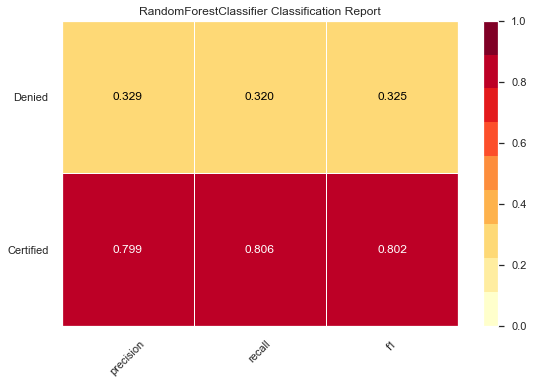

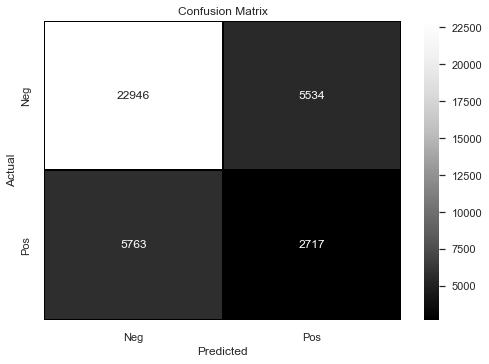

32.04
32.48
32.93
69.43


In [130]:
data15=data[data['YEAR'] == 2015]
d15=data15.copy(deep=True)
data15.to_csv('Data2015.csv', index=False)
data15.head()


x15 = data15.drop('CASE_STATUS', axis=1)
y15 = data15.CASE_STATUS
from imblearn.under_sampling import NearMiss
nm = NearMiss()
xu15,yu15 = nm.fit_resample(x15,y15) 

data15.CASE_STATUS.value_counts()

yu15.value_counts()

n0=d15[d15['CASE_STATUS']==0]
df=n0.sample(n=30000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu15=xu15.append(nx)
yu15=yu15.append(ny)


from sklearn.ensemble import RandomForestClassifier
rf15=RandomForestClassifier(n_estimators=11)
rf15.fit(xu15,yu15)
r15_pred=rf15.predict(xu16)


from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf15, classes=['Certified','Denied'])
visualizer.fit(xu15, yu15)
visualizer.score(xu16, yu16)
g = visualizer.poof()

cm = confusion_matrix(yu16,r15_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='Greys_r',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


from sklearn.metrics import accuracy_score
r153_accuracy=round(accuracy_score(yu16,r15_pred)*100,2)
r153_recall = round(recall_score(yu16,r15_pred)*100,2)
r153_f1=round(f1_score(yu16,r15_pred)*100,2)
r153_prec=round(precision_score(yu16,r15_pred)*100,2)
print(r153_recall)
print(r153_f1)
print(r153_prec)
print(r153_accuracy)





### 2015 with 40,000 more Certified class data

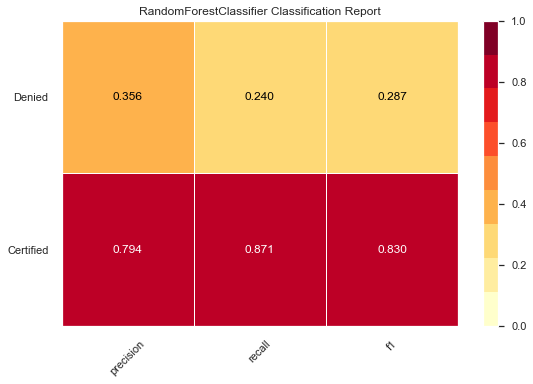

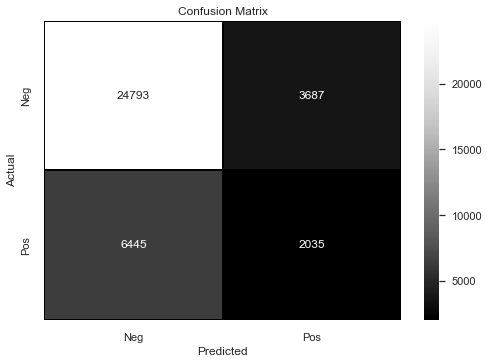

24.0
28.66
35.56
72.59


In [131]:
data15=data[data['YEAR'] == 2015]
d15=data15.copy(deep=True)
data15.to_csv('Data2015.csv', index=False)
data15.head()


x15 = data15.drop('CASE_STATUS', axis=1)
y15 = data15.CASE_STATUS
from imblearn.under_sampling import NearMiss
nm = NearMiss()
xu15,yu15 = nm.fit_resample(x15,y15) 

data15.CASE_STATUS.value_counts()

yu15.value_counts()

n0=d15[d15['CASE_STATUS']==0]
df=n0.sample(n=40000)

nx=df.drop('CASE_STATUS',axis=1)
ny=df.CASE_STATUS
xu15=xu15.append(nx)
yu15=yu15.append(ny)


from sklearn.ensemble import RandomForestClassifier
rf15=RandomForestClassifier(n_estimators=11)
rf15.fit(xu15,yu15)
r15_pred=rf15.predict(xu16)


from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf15, classes=['Certified','Denied'])
visualizer.fit(xu15, yu15)
visualizer.score(xu16, yu16)
g = visualizer.poof()

cm = confusion_matrix(yu16,r15_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='Greys_r',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


from sklearn.metrics import accuracy_score
r154_accuracy=round(accuracy_score(yu16,r15_pred)*100,2)
r154_recall = round(recall_score(yu16,r15_pred)*100,2)
r154_f1=round(f1_score(yu16,r15_pred)*100,2)
r154_prec=round(precision_score(yu16,r15_pred)*100,2)
print(r154_recall)
print(r154_f1)
print(r154_prec)
print(r154_accuracy)





### Report on Overall Data

In [132]:
report1 = pd.DataFrame()
report1['Algorithm'] = ['Logistic Regression','Decision Tree','Naive Bayes','Random Forest','KNN Classifier']
report1['Recall Score'] = [l_recall,d_recall,nb_recall,r_recall,k_recall]
report1['Precision Score'] = [l_prec,d_prec,nb_prec,r_prec,k_prec]
report1['F1 Score']= [l_f1,d_f1,nb_f1,r_f1,k_f1]
report1['Accuracy'] = [l_accuracy,d_accuracy,nb_accuracy,r_accuracy,k_accuracy]
report1

,Algorithm,Recall Score,Precision Score,F1 Score,Accuracy
0,Logistic Regression,67.26,69.07,68.16,68.40
1,Decision Tree,95.73,99.35,97.51,97.54
2,Naive Bayes,6.29,91.98,11.78,52.61
3,Random Forest,96.13,99.31,97.69,97.72
4,KNN Classifier,95.47,98.89,97.15,97.18


### Report for best model to predict 2016 using Random Forest Classifier

In [136]:
report2 = pd.DataFrame()
report2['Year'] = ['2011','2012','2013','2014','2015','2015_10k','2015_20k','2015_30k','2015_40k']
report2['Recall Score'] = [r11_recall,r12_recall,r13_recall,r14_recall,r15_recall,r151_recall,r152_recall,r153_recall,r154_recall]
report2['Precision Score'] = [r11_prec,r12_prec,r13_prec,r14_prec,r15_prec,r151_prec,r152_prec,r153_prec,r154_prec]
report2['F1 Score']= [r11_f1,r12_f1,r13_f1,r14_f1,r15_f1,r151_f1,r152_f1,r153_f1,r154_f1]
report2['Accuracy'] = [r11_accuracy,r12_accuracy,r13_accuracy,r14_accuracy,r15_accuracy,r151_accuracy,r152_accuracy,r153_accuracy,r154_accuracy]
report2

,Year,Recall Score,Precision Score,F1 Score,Accuracy
0,2011,76.90,23.56,36.07,37.46
1,2012,70.61,24.31,36.17,42.82
2,2013,55.55,23.72,33.25,48.82
3,2014,52.62,27.29,35.94,56.97
4,2015,44.98,31.84,37.28,65.28
5,2015_10k,65.53,27.20,38.44,51.85
6,2015_20k,46.99,31.45,37.68,64.33
7,2015_30k,32.04,32.93,32.48,69.43
8,2015_40k,24.00,35.56,28.66,72.59


<BarContainer object of 5 artists>

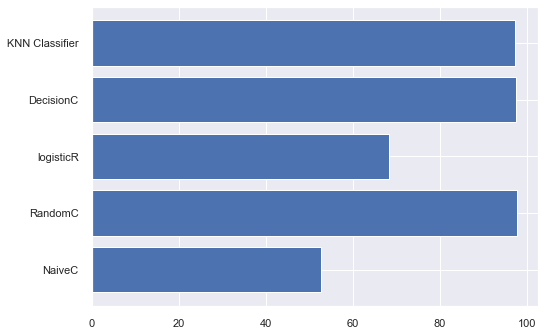

In [137]:
plt.barh(['NaiveC','RandomC','logisticR','DecisionC','KNN Classifier'],[nb_accuracy,r_accuracy,l_accuracy,d_accuracy,k_accuracy], color='b')

<BarContainer object of 5 artists>

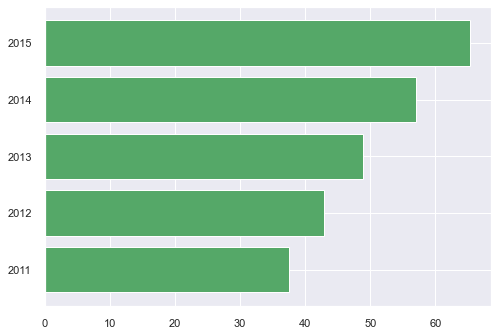

In [139]:
plt.barh(['2011','2012','2013','2014','2015'],[r11_accuracy,r12_accuracy,r13_accuracy,r14_accuracy,r15_accuracy], color='g')